In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
from fermipy.gtanalysis import GTAnalysis

In [3]:
gta = GTAnalysis.create('data/fit2_sed.npy')

2022-05-25 17:12:04 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.1+5.ga1de.dirty 
ScienceTools version 2.1.19
2022-05-25 17:12:05 INFO    GTAnalysis.setup(): Running setup.
2022-05-25 17:12:05 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2022-05-25 17:12:05 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2022-05-25 17:12:05 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
/Users/hfleisc1/mambaforge/envs/fermi-21/lib/python3.9/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/Users/hfleisc1/mambaforge/envs/fermi-21/lib/python3.9/site-packages/fermipy/irfs.py:52: 

Drm_Cache::update Measured counts < 0 4FGL J1221.4-0634 23 -3.16963e-12 5.8433e-12
0.57141 0.63714 0.627586 0.554603 0.444619 0.330903 0.219693 0.132171 0.0712835 0.032272 0.0133772 0.00410797 0.00140145 0.00031844 9.72625e-05 2.14837e-05 6.37548e-06 1.5398e-06 4.17718e-07 8.85368e-08 1.37222e-08 1.48829e-09 1.23325e-10 5.8433e-12 


2022-05-25 17:12:15 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 02.
2022-05-25 17:12:20 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 03.
2022-05-25 17:12:28 INFO    GTAnalysis.setup(): Finished setup.
2022-05-25 17:12:28 INFO    GTAnalysis.load_roi(): Loading ROI file: /Users/hfleisc1/fermi_software/summer2022/fermi-summer-school/Likelihood_Advanced/data/fit2_sed.npy
2022-05-25 17:12:28 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-05-25 17:12:32 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 01.
2022-05-25 17:12:36 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 02.
2022-05-25 17:12:41 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 03.
2022-05-25 17:12:48 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [4]:
gta.print_roi()

2022-05-25 17:12:48 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1256.1-0547   PointSource    PLSuperExpCuto    0.000  13258.48      7521.9
4FGL J1243.9-0218   PointSource    LogParabola       4.627     11.89        38.6
4FGL J1315.9-0732   PointSource    LogParabola       5.216     17.13        37.1
4FGL J1234.7-0434   PointSource    PowerLaw          5.469      4.19        26.1
4FGL J1256.2-1146   PointSource    PowerLaw          5.987     35.76        87.0
4FGL J1322.3-0606   PointSource    LogParabola       6.518     11.59        18.7
4FGL J1233.7-0144   PointSource    PowerLaw          6.904     28.03       107.1
4FGL J1310.2-1158   PointSource    PowerLaw          7.100     14.79        47.8
4FGL J1311.0+0034   PointSource    PowerLaw          7.357     24.23        77.5
4FGL J1322.6-0936   PointSource    LogParabola       7.5

In [5]:
sed = np.load('data/4fgl_j1256.1-0547_sed.npy', allow_pickle=True).flat[0]

In [6]:
sed.keys()

dict_keys(['name', 'loge_min', 'loge_max', 'loge_ctr', 'loge_ref', 'e_min', 'e_max', 'e_ctr', 'e_ref', 'ref_flux', 'ref_eflux', 'ref_dnde', 'ref_dnde_e_min', 'ref_dnde_e_max', 'ref_e2dnde', 'ref_npred', 'norm', 'flux', 'eflux', 'dnde', 'e2dnde', 'index', 'npred', 'ts', 'loglike', 'norm_scan', 'dloglike_scan', 'loglike_scan', 'fit_quality', 'fit_status', 'correlation', 'model_flux', 'config', 'norm_err', 'norm_err_hi', 'norm_err_lo', 'norm_ul95', 'norm_ul', 'flux_err', 'flux_err_hi', 'flux_err_lo', 'flux_ul95', 'flux_ul', 'eflux_err', 'eflux_err_hi', 'eflux_err_lo', 'eflux_ul95', 'eflux_ul', 'dnde_err', 'dnde_err_hi', 'dnde_err_lo', 'dnde_ul95', 'dnde_ul', 'e2dnde_err', 'e2dnde_err_hi', 'e2dnde_err_lo', 'e2dnde_ul95', 'e2dnde_ul', 'SpectrumType', 'param_names', 'param_values', 'param_errors', 'param_covariance', 'param_correlation', 'file'])

In [7]:
sed['e_min']

array([  100.        ,   133.35214322,   177.827941  ,   237.13737057,
         316.22776602,   421.69650343,   562.34132519,   749.89420933,
        1000.        ,  1333.52143216,  1778.27941004,  2371.37370566,
        3162.27766017,  4216.96503429,  5623.4132519 ,  7498.94209332,
       10000.        , 13335.21432163, 17782.79410039, 23713.73705662,
       31622.77660168, 42169.65034286, 56234.13251903, 74989.42093325])

In [8]:
from astropy.io import fits

In [9]:
exp_hdu = fits.open('data/bexpmap_00.fits')

In [10]:
exp_hdu.info()

Filename: data/bexpmap_00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   (360, 180, 25)   float32   
  1  ENERGIES      1 BinTableHDU     13   25R x 1C   [1D]   
  2  GTI           1 BinTableHDU     18   2791R x 2C   [D, D]   


In [11]:
exp_hdu[1].data

FITS_rec([(   100.        ,), (   133.35214322,), (   177.827941  ,),
          (   237.13737057,), (   316.22776602,), (   421.69650343,),
          (   562.34132519,), (   749.89420933,), (  1000.        ,),
          (  1333.52143216,), (  1778.27941004,), (  2371.37370566,),
          (  3162.27766017,), (  4216.96503429,), (  5623.4132519 ,),
          (  7498.94209332,), ( 10000.        ,), ( 13335.21432163,),
          ( 17782.79410039,), ( 23713.73705662,), ( 31622.77660168,),
          ( 42169.65034286,), ( 56234.13251903,), ( 74989.42093325,),
          (100000.        ,)], dtype=(numpy.record, [('Energy', '>f8')]))

In [12]:
gta.energies

array([   100.        ,    133.35214322,    177.827941  ,    237.13737057,
          316.22776602,    421.69650343,    562.34132519,    749.89420933,
         1000.        ,   1333.52143216,   1778.27941004,   2371.37370566,
         3162.27766017,   4216.96503429,   5623.4132519 ,   7498.94209332,
        10000.        ,  13335.21432163,  17782.79410039,  23713.73705662,
        31622.77660168,  42169.65034286,  56234.13251903,  74989.42093325,
       100000.        ])

In [13]:
sed['loge_min']

array([2.   , 2.125, 2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875, 3.   ,
       3.125, 3.25 , 3.375, 3.5  , 3.625, 3.75 , 3.875, 4.   , 4.125,
       4.25 , 4.375, 4.5  , 4.625, 4.75 , 4.875])

In [14]:
10**sed['loge_min']

array([  100.        ,   133.35214322,   177.827941  ,   237.13737057,
         316.22776602,   421.69650343,   562.34132519,   749.89420933,
        1000.        ,  1333.52143216,  1778.27941004,  2371.37370566,
        3162.27766017,  4216.96503429,  5623.4132519 ,  7498.94209332,
       10000.        , 13335.21432163, 17782.79410039, 23713.73705662,
       31622.77660168, 42169.65034286, 56234.13251903, 74989.42093325])

In [15]:
loge_bins_input = np.array([ 2.   ,  2.125, 2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  , 5.0])

In [16]:
sed2 = gta.sed('3C 279', loge_bins = loge_bins_input)

2022-05-25 17:12:48 INFO    GTAnalysis.sed(): Computing SED for 4FGL J1256.1-0547
2022-05-25 17:12:49 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-25 17:12:49 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1256.1-0547     : ['Prefactor']
/Users/hfleisc1/mambaforge/envs/fermi-21/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-05-25 17:12:59 INFO    GTAnalysis.sed(): Finished SED
2022-05-25 17:13:07 INFO    GTAnalysis.sed(): Execution time: 18.66 s


In [17]:
c = np.load('data/fit2_sed.npy', allow_pickle=True).flat[0]

In [18]:
E = np.array(c['sources']['4FGL J1256.1-0547']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J1256.1-0547']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J1256.1-0547']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J1256.1-0547']['model_flux']['dnde_lo'])

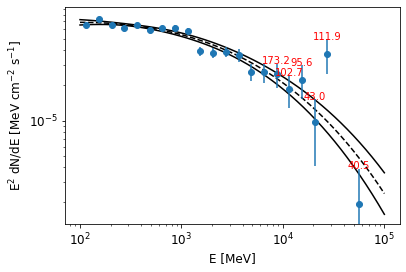

In [37]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(np.array(sed2['e_ctr']),
             sed2['e2dnde'], 
             yerr=sed2['e2dnde_err'], fmt ='o')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')

maxF = np.max(sed2['e2dnde'])
for TS, e, f in zip(sed2['ts'], sed2['e_ctr'], sed2['e2dnde']+sed2['e2dnde_err']):
    if TS < 200:
        plt.annotate(f'{TS:.1f}', (e, f),   ha='center', size=10, color="red" )
plt.show()

